In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=np.load('stringer_spontaneous.npy',allow_pickle=True).item()
sresp=data["sresp"]


In [3]:
list(data.keys())

['sresp',
 'run',
 'beh_svd_time',
 'beh_svd_mask',
 'stat',
 'pupilArea',
 'pupilCOM',
 'xyz']

In [4]:
len(sresp[0,:])

7018

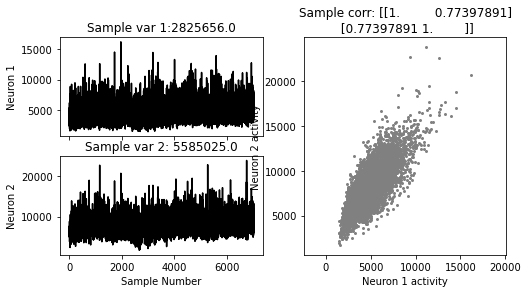

In [5]:
#getting the variance of the two halves of the Sresp Data

var1=np.var(sresp[:5000,:],axis=0)
var2=np.var(sresp[5000:10000,:],axis=0)
fig = plt.figure(figsize=[8, 4])
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(var1, color='k')
plt.ylabel('Neuron 1')
plt.title('Sample var 1:{}'.format(np.var(var1)))
ax1.set_xticklabels([])
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(var2, color='k')
plt.xlabel('Sample Number')
plt.ylabel('Neuron 2')
plt.title(f'Sample var 2: {np.var(var2)}')
ax3 = fig.add_subplot(gs[:, 1])
ax3.plot(var1,var2, '.', markerfacecolor=[.5, .5, .5],
           markeredgewidth=0)
ax3.axis('equal')
plt.xlabel('Neuron 1 activity')
plt.ylabel('Neuron 2 activity')
plt.title('Sample corr: {}'.format(np.corrcoef(var1,var2)))
plt.show()

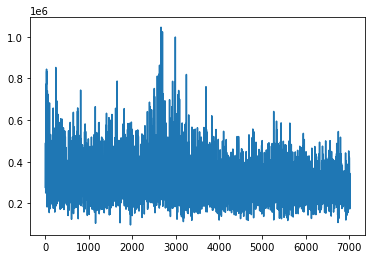

In [618]:
#finding correlation Coeff of the two halves

covariance=((sresp[:5000,:] - sresp[:5000,:].mean()) * (sresp[5000:10000,:] - sresp[5000:10000,:].mean())).sum()
corelation_coef=covariance/np.sqrt(var1*var2)

plt.plot(corelation_coef)


# coff=np.corrcoef(sresp[:5000,:],sresp[5000:,:])
# plt.plot(coff) 

In [619]:
# corr_coeff=0.7

# cov=np.cov(sresp[:5000,:],sresp[5000:,:],bias=True)

# #plt.plot(cov)
# #corr_coeff= np.matmul(cov, 1 / np.sqrt(var1,var2))
# cov = corr_coeff * np.sqrt(var1 * var2)
cov_matrix = np.array([[var1, covariance], [covariance, var2]])
cov_matrix

C:\Users\asus\AppData\Local\Temp\ipykernel_22052\50817639.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cov_matrix = np.array([[var1, covariance], [covariance, var2]])


array([[array([2598.4294, 5103.223 , 5371.008 , ..., 3717.8984, 7804.964 ,
               7410.0337], dtype=float32)                                 ,
        1760062700.0],
       [1760062700.0,
        array([ 5053.495 ,  7319.2114,  7691.284 , ...,  7039.3584, 13224.973 ,
               10177.899 ], dtype=float32)                                     ]],
      dtype=object)

In [6]:
def sort_evals_descending(evals, evectors):

  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    : Vector of eigenvalues
    evectors (numpy array of floats) : Corresponding matrix of eigenvectors
                                        each column corresponds to a different
                                        eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]
  return evals, evectors



def PCA_(X):
    X = X-np.mean(X,axis=0,keepdims=True)
    cov_matrix=np.matmul(X.T,X)
    evals,evec=np.linalg.eigh(cov_matrix)
    evals,evec=sort_evals_descending(evals,evec)
    score=X@evec

    return evals,evec,score
  
    
evals,evec,score=PCA_(sresp)

In [621]:
evec.shape

(7018, 7018)

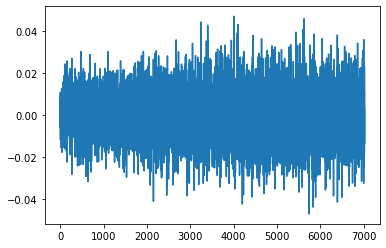

In [622]:
plt.plot(evec[0])

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

#Scaling Sresp 

# scaler=StandardScaler()
# scaler.fit(sresp)
# scaled_data=scaler.transform(sresp)

#performing pca on scaled Data
# pca=PCA(n_components=1000)
# x_pca=pca.fit_transform(scaled_data)
# x_pca.shape

In [8]:
pupilArea=data['pupilArea']
pupilArea.shape
run=data['run']


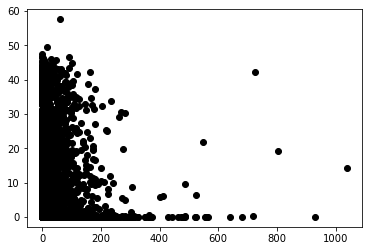

In [9]:
plt.scatter(sresp[:7018,:1],run,color='k')

In [10]:
#performing pca on unscaled Data
Z = zscore(sresp, axis=1)
X = PCA(n_components=1000).fit_transform(Z.T)

In [151]:
X[0,:]

array([-1.65569627e+00,  6.02385092e+00, -3.00498605e+00, -4.09029388e+00,
        3.63026023e+00,  1.76401913e+00, -6.82744086e-02,  4.33191919e+00,
        2.76127267e+00,  4.24312592e+00, -3.63786507e+00, -9.70888615e-01,
        1.58397710e+00,  2.18187213e+00, -4.97174822e-02,  3.42109823e+00,
       -1.17520881e+00,  3.29063356e-01, -7.24609435e-01, -1.20732045e+00,
       -1.55468476e+00,  3.24220598e-01, -4.02150869e-01, -8.88722062e-01,
       -3.41629842e-03, -2.20137787e+00,  1.83136359e-01,  1.07366109e+00,
       -1.61476493e+00,  3.48493099e-01, -1.04975498e+00, -1.89391589e+00,
       -1.57843995e+00,  1.12310755e+00,  2.96089387e+00,  4.54717541e+00,
       -8.86635482e-01,  1.80709875e+00,  3.36423779e+00,  1.92425835e+00,
        4.65890735e-01,  8.35211992e-01,  3.99330544e+00,  5.97872019e-01,
        1.35406196e+00,  3.98946166e-01,  3.23150039e+00,  2.35078430e+00,
       -5.68671167e-01,  6.67910755e-01, -4.46539968e-01,  1.42900841e-02,
        3.35326135e-01, -

In [628]:
# first column of X with first row of sresp///

var_1=np.var(X[:,0]) #first neuron
var_2=np.var(sresp[0,:]) #individual neurons columns
covariance=((X[:,0] - X[:,0].mean()) * (sresp[0,:] - sresp[0,:].mean())).sum()
corelation_coef=covariance/np.sqrt(var_1*var_2)

print(corelation_coef)

573.39465


In [11]:
pca_comp=X
list_of_timebins=[]
neuron_dict={}
cor_neuron={}

def calculate_variance(x,y):
    return np.var(x),np.var(y)

def calculate_covariance(x,y):
    return ((x - x.mean()) * (y - y.mean())).sum()

def calculate_corelationCoefficient(covariance,var1,var2):
    return covariance/np.sqrt(var_1*var_2)

for i in range(sresp.shape[0]):
    x,y=pca_comp[:,0],sresp[i,:]
    #var1,var2=calculate_variance(x,y)
    #covariance=calculate_covariance(x,y)
    #corCoeff=calculate_corelationCoefficient(covariance,var1,var2)
    corCoeff=np.corrcoef(x,y)
    if np.abs(corCoeff[0,1])>=0.25:
        list_of_timebins.append(np.vstack(y))
        cor_neuron[i]=(corCoeff[0,1])
        #neuron_dict[i]=y


#plt.scatter(pupilArea[:425,0],np.vstack(list_of_corCoeff))


for i in range(len(list_of_timebins)):
     neuron_dict[i]=list_of_timebins[i]


#neuron_dict

#plt.scatter(pupilArea,np.vstack(list_of_corCoeff))

In [76]:
m=np.array(list_of_timebins).reshape((439,7018))
m.shape

(439, 7018)

In [74]:
# n=len(sresp[0])
# np.arange(0,7018,1)

In [632]:
X.shape

(7018, 1000)

In [633]:
pupilArea.shape

(7018, 1)

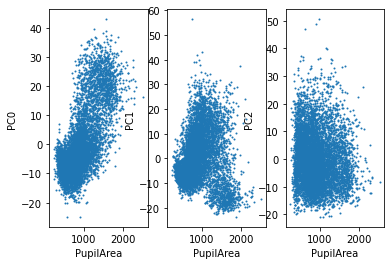

In [13]:
for j in range(3):
  ax = plt.subplot(1, 3, j + 1)
  plt.scatter(pupilArea, X[:, j], s=1)
  ax.set(xlabel='PupilArea', ylabel='PC%d'%j)
plt.show()

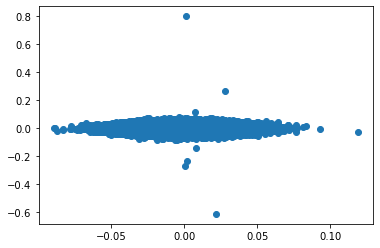

In [14]:
plt.scatter(evec[0:3500],evec[3500:7000])

In [ ]:
def plot_basis_vectors(X, W):
  """
  Plots bivariate data as well as new basis vectors.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable
    W (numpy array of floats) : Square matrix representing new orthonormal
                                basis each column represents a basis vector

  Returns:
    Nothing.
  """

  plt.figure(figsize=[4, 4])
  plt.plot(X[:, 0], X[:, 1], '.', color=[.5, .5, .5], label='Data')
  plt.axis('equal')
  plt.xlabel('3500 Neurons activity')
  plt.ylabel('Remaining Neurons activity')
  plt.plot([0, W[0, 0]], [0, W[1, 0]], color='r', linewidth=3,
           label='Basis vector 1')
  plt.plot([0, W[0, 1]], [0, W[1, 1]], color='b', linewidth=3,
           label='Basis vector 2')
  plt.legend()
  plt.show()

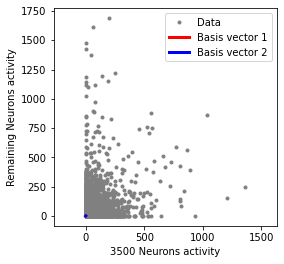

In [ ]:
plot_basis_vectors(sresp,evec)

In [ ]:
evec.shape

(7018, 7018)

In [ ]:
pupil_scaled=StandardScaler()
pupil_scaled.fit(pupilArea)
pupil_scaled_data=pupil_scaled.transform(pupilArea)


In [48]:
n=np.array(list(cor_neuron.values()))
n.shape


(439,)

In [73]:
from sklearn.linear_model import LinearRegression,Ridge
import xgboost as xgb

model=LinearRegression()
model.fit(pupilArea[:439],n) #X_train,Y_train


LinearRegression()

In [67]:
y_pred=m.predict(pupilArea[700:1139])

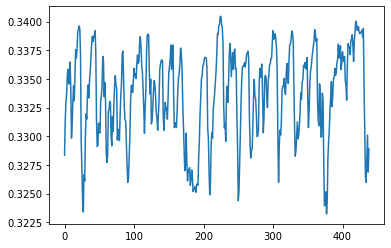

In [68]:
plt.plot(y_pred)

In [69]:
print(max(y_pred)*100)
#sorted_y=sorted(y_pred)

34.04702436905848


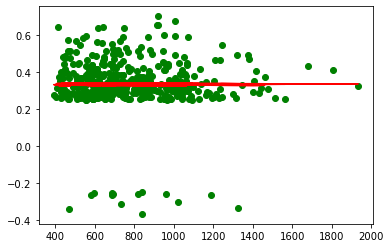

In [70]:
plt.scatter(pupilArea[:439],n,color='green')
plt.plot(pupilArea[:439],y_pred,color='red')
plt.show()

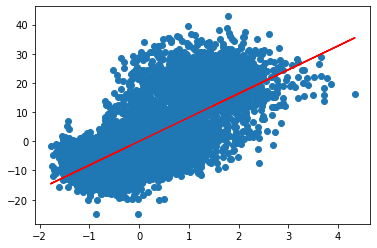

In [ ]:

from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(pupil_scaled_data.squeeze(), X[:7018, 0])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, pupil_scaled_data.squeeze()))

plt.scatter(pupil_scaled_data.squeeze(),  X[:7018, 0])
plt.plot(pupil_scaled_data.squeeze(), mymodel,color="r")
plt.show()


In [ ]:
X.shape

(7018, 1000)

In [ ]:
def sigmoid_function(x):
    z = (1/(1 + np.exp(-x)))
    return z

sig=sigmoid_function(X)

#plt.plot(sig)




In [ ]:
def tanh_function(x):
    z = (2/(1 + np.exp(-2*x))) -1
    return z

tan=tanh_function(X)

In [ ]:
def relu_function(x):
    if np.any(x)<0:
        return 0
    else:
        return x

rel=relu_function(evec)

In [ ]:
pupilArea.squeeze()

array([ 833.33389507,  745.1392692 ,  838.57225981, ..., 1369.07543537,
       1449.10889827, 1457.66741277])

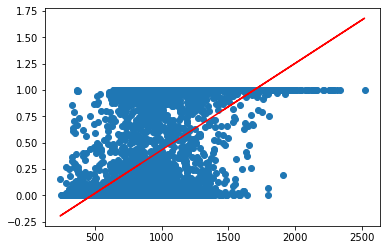

In [ ]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(pupilArea.squeeze(), sig[:, 0])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, pupilArea.squeeze()))

plt.scatter(pupilArea.squeeze(), sig[:, 0])
plt.plot(pupilArea.squeeze(), mymodel,color="r")
plt.show()

In [15]:
import torch
from torch import nn
from torch import optim

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [109]:
# class DeepPupil(nn.Module):

#     def __init__(self):
        
#         super().__init__()
#         self.linear1=nn.Linear(439, 256)
#         self.linear2=nn.Linear(256,128)
#         self.linear3=nn.Linear(128,32)
#         self.linear4=nn.Linear(32,2)
#         self.outputlayer=nn.Linear(2,1) 
#          # hidden units --> output
#         self.activation=nn.ReLU()
#         self.activation2=nn.Tanh()
#         #self.activation3=nn.Sigmoid()
#         self.dropout = nn.Dropout(0.8)
#         self.dropout2= nn.Dropout(0.2)

#     def forward(self,xb):
#         z1=self.linear1(xb)
#         a1=self.activation(z1)
#         d1=self.dropout(a1)

#         z2=self.linear2(d1)
#         a2=self.activation2(z2)
#         d2=self.dropout(a2)

#         z3=self.linear3(d2)
#         a3=self.activation(z3)
#         d3=self.dropout(a3)
        
#         z4=self.linear4(d3)
#         a4=self.activation(z4)
#         d4=self.dropout2(a4)
        
#         z5=self.outputlayer(d4)
#         a5=self.activation(z5)
#         d5=self.dropout(a5)
       
        
#         return d5


In [130]:
class DeepPupil(nn.Module):

    def __init__(self):
        
        super().__init__()
        self.linear1=nn.Linear(439, 250)
        self.linear2=nn.Linear(250,80)
        self.linear3=nn.Linear(80,1)
      
        #self.outputlayer=nn.Linear(2,1) 
         # hidden units --> output
        self.activation=nn.ReLU()
        self.activation2=nn.Tanh()
        #self.activation3=nn.Sigmoid()
        self.dropout = nn.Dropout(0.8)
        self.dropout2= nn.Dropout(0.1)

    def forward(self,xb):
        z1=self.linear1(xb)
        a1=self.activation(z1)
        d1=self.dropout(a1)

        z2=self.linear2(d1)
        a2=self.activation2(z2)
        d2=self.dropout(a2)

        z3=self.linear3(d2)
        a3=self.activation2(z3)
        d3=self.dropout2(a3)
        
       
        
        return d3

In [118]:
deep=DeepPupil()

In [145]:
from torch.utils.data import Dataset
from torch.utils.data import SubsetRandomSampler

class MyDataset(Dataset):
    
    def __init__(self,batch_size):
        self.batch_size=batch_size
   
        
    def __len__(self):
        return len(m)

    def __getitem__(self,index):
        
        x=[]
        y=[]
        keys = np.random.choice(index,size=self.batch_size)
        #print(keys)
        for k in keys:
            x.append(m[:,k])
            y.append(pupilArea[k])
            
        x,y = torch.tensor(x,dtype=torch.float32), torch.tensor(y,dtype=torch.float32) 
        return x,y




batch_size = 4
validation_split = .2
shuffle_dataset = True
random_seed= 42
dataset = MyDataset(batch_size)


# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
print(split)
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]
print(len(val_indices),len(train_indices))
# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)



train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler,pin_memory=True)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler,pin_memory=True)


87
87 352


In [ ]:
def generateSubsetSamplers(dataset_size, ratio=0.8, random_seed=0):
  indices = list(range(dataset_size))
  np.random.seed(random_seed)
  np.random.shuffle(indices)

  split = int(np.round(ratio * dataset_size))
  train_indices, val_indices = indices[:split], indices[split:]

  return SubsetRandomSampler(train_indices), SubsetRandomSampler(val_indices)




In [143]:
for idx,(x,y) in enumerate(validation_loader):
    print(idx,x,y)
    break

0 tensor([[[9.9884e+00, 4.9590e+01, 1.0454e+01,  ..., 2.9585e+00,
          5.4007e+01, 4.4179e+00],
         [2.9567e+00, 0.0000e+00, 2.7818e+01,  ..., 0.0000e+00,
          2.4190e+01, 0.0000e+00],
         [1.3880e+01, 0.0000e+00, 1.5137e+01,  ..., 9.8388e+00,
          7.6735e+01, 4.4867e+00],
         [1.5458e+01, 2.8362e+01, 6.3337e-01,  ..., 0.0000e+00,
          0.0000e+00, 1.1346e+01]],

        [[3.6261e+01, 1.2419e+01, 7.1973e+01,  ..., 0.0000e+00,
          0.0000e+00, 1.8668e+01],
         [0.0000e+00, 5.5195e+01, 2.3429e+01,  ..., 2.7841e+01,
          8.2814e+00, 5.4651e+01],
         [1.2153e+01, 2.0344e+01, 0.0000e+00,  ..., 0.0000e+00,
          1.1625e+02, 5.4925e+01],
         [0.0000e+00, 2.2851e+01, 2.0493e+01,  ..., 3.2024e+00,
          0.0000e+00, 0.0000e+00]],

        [[8.4711e+00, 1.5086e+02, 1.2058e+01,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [3.4223e+00, 6.5888e+01, 8.2357e+01,  ..., 0.0000e+00,
          2.1563e-01, 0.0000e+00],
    

In [121]:
# def train(net, loss_fn, train_data, train_labels,
#           n_epochs=1000, learning_rate=1e-4):

#   # Initialize PyTorch SGD optimizer
#   optimizer = optim.SGD(net.parameters(), lr=learning_rate)

#   # Placeholder to save the loss at each iteration
#   train_loss = []

#   # Loop over epochs
#   for i in range(n_epochs):

#     ######################################################################
#     ## TO DO for students: fill in missing code for GD iteration
#     #raise NotImplementedError("Student exercise: write code for GD iterations")
#     ######################################################################

#     # compute network output from inputs in train_data
#     out = net(train_data)  # compute network output from inputs in train_data
    
#     # evaluate loss function
#     loss = loss_fn(out, train_labels)

#     # Clear previous gradients
#     optimizer.zero_grad()
    

#     # Compute gradients
#     loss.backward()

#     # Update weights
#     optimizer.step()

#     # Store current value of loss
#     train_loss.append(loss.item())  # .item() needed to transform the tensor output of loss_fn to a scalar

#     # Track progress
#     if (i + 1) % (n_epochs // 5) == 0:
#       print(f'iteration {i + 1}/{n_epochs} | loss: {loss.item():.3f}')


  
#   return train_loss


# # Set random seeds for reproducibility
# np.random.seed(1)
# torch.manual_seed(1)  

# for data,label in train_loader:

# # Initialize network with 10 hidden units
#   net = DeepPupil()

# # Initialize built-in PyTorch MSE loss function
#   loss_fn = nn.MSELoss()

# # Run gradient descent on data
#   train_loss = train(net, loss_fn, data, label)




In [128]:
from torch.utils.tensorboard import SummaryWriter
writer=SummaryWriter()

In [133]:
train_losses=[]
valid_losses=[]
model = DeepPupil()
if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 50
min_valid_loss = np.inf
 
for e in range(epochs):
    train_loss = 0.0
    for data, labels in train_loader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        writer.add_scalar('Loss/train',loss,e)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        train_losses.append(loss.item())

    # valid_loss = 0.0
    # model.eval()
    # with torch.no_grad():     
    # # Optional when not using Model Specific layer
    #     for data, labels in validation_loader:
            
    #     # Transfer Data to GPU if available
    #         if torch.cuda.is_available():
    #             data, labels = data.cuda(), labels.cuda()
         
    #     # Forward Pass
    #         target = model(data)
    #     # Find the Loss
    #         loss = criterion(target,labels)
        
    #     # Calculate Loss
    #         valid_loss += loss.item()
    #         valid_losses.append(loss.item())
 
    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(train_loader)}')

    # if min_valid_loss > valid_loss:
    #     print(f'Validation Loss Decreased({min_valid_loss:.6f\
    #     }--->{valid_loss:.6f}) \t Saving The Model')
    #     min_valid_loss = valid_loss
         
        # # Saving State Dict
        # torch.save(model.state_dict(), 'saved_model.pth')

#writer.flush()

Epoch 1 		 Training Loss: 4479.429951060902
Epoch 2 		 Training Loss: 4292.158633145419
Epoch 3 		 Training Loss: 4335.878134987571
Epoch 4 		 Training Loss: 4248.54702203924
Epoch 5 		 Training Loss: 4317.58109630238
Epoch 6 		 Training Loss: 4317.301158558239
Epoch 7 		 Training Loss: 4306.028181596236
Epoch 8 		 Training Loss: 4335.409174138849
Epoch 9 		 Training Loss: 4244.9722456498575
Epoch 10 		 Training Loss: 4364.673495205966
Epoch 11 		 Training Loss: 4334.0311723188925
Epoch 12 		 Training Loss: 4256.993261163885
Epoch 13 		 Training Loss: 4301.284384987571
Epoch 14 		 Training Loss: 4338.701532537287
Epoch 15 		 Training Loss: 4303.383897261186
Epoch 16 		 Training Loss: 4312.855155251243
Epoch 17 		 Training Loss: 4275.7219571200285
Epoch 18 		 Training Loss: 4403.733071067117
Epoch 19 		 Training Loss: 4261.126331676136
Epoch 20 		 Training Loss: 4266.177187832919
Epoch 21 		 Training Loss: 4250.908167058771
Epoch 22 		 Training Loss: 4359.860595703125
Epoch 23 		 Traini

(array([   5.,   51.,  213.,  634., 1125., 1127.,  764.,  331.,  114.,
          36.]),
 array([2970.57788086, 3198.00593262, 3425.43398437, 3652.86203613,
        3880.29008789, 4107.71813965, 4335.14619141, 4562.57424316,
        4790.00229492, 5017.43034668, 5244.85839844]),
 <BarContainer object of 10 artists>)

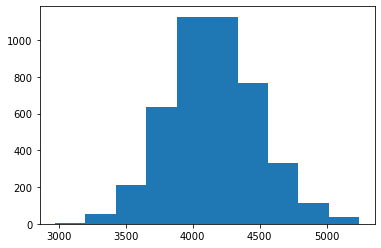

In [112]:
plt.hist(train_losses)